# Baywheels Trip Data Analysis
## by Hiroyuki Kondo

## Preliminary Wrangling

Baywheels is a bike share service by Lyft in the Bay Area. There are two types of users in this service: member and customer. The members pay 15 dollars per month or 149 dollars per year and can use bikes forty-five minutes without any additional fees. If they use a bike longer than forty-five minutes at a time, they need to pay 3 dollars per additional fifteen minutes. The customers pay 2 dollars for a ride up to thirty minutes and pay an extra 3 dollars per additional fifteen minutes[1].  

I downloaded the data of October 2019 from the following URL (https://s3.amazonaws.com/baywheels-data/index.html)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

%matplotlib inline

In [2]:
baywheels = pd.read_csv("data/201910-baywheels-tripdata.csv")
print(baywheels.shape)
baywheels.head(10)

(239895, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,62337,2019-10-31 16:25:01.5970,2019-11-01 09:43:59.0290,148,Horton St at 40th St,37.829705,-122.287610,385,Woolsey St at Sacramento St,37.850578,-122.278175,12222,Customer,NaN,NaN,No
1,72610,2019-10-31 13:04:11.1950,2019-11-01 09:14:21.8050,376,Illinois St at 20th St,37.760458,-122.387540,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,282,Customer,NaN,NaN,No
2,56636,2019-10-31 17:17:37.6480,2019-11-01 09:01:33.7720,453,Brannan St at 4th St,37.777934,-122.396973,453,Brannan St at 4th St,37.777934,-122.396973,10940,Customer,NaN,NaN,No
3,42250,2019-10-31 20:11:11.1270,2019-11-01 07:55:21.7440,182,19th Street BART Station,37.809369,-122.267951,163,Lake Merritt BART Station,37.797320,-122.265320,12623,Subscriber,1997.0,Male,No
4,40076,2019-10-31 18:48:32.1410,2019-11-01 05:56:28.4670,237,Fruitvale BART Station,37.775232,-122.224498,237,Fruitvale BART Station,37.775232,-122.224498,2601,Customer,NaN,NaN,No
5,21801,2019-10-31 23:22:33.1830,2019-11-01 05:25:54.9590,123,Folsom St at 19th St,37.760594,-122.414817,419,Fern St at Polk St,37.788197,-122.420373,9534,Customer,NaN,NaN,No
6,26418,2019-10-31 20:11:05.4680,2019-11-01 03:31:23.9090,77,11th St at Natoma St,37.773507,-122.416040,86,Market St at Dolores St,37.769305,-122.426826,12516,Customer,1985.0,Male,No
7,51069,2019-10-31 12:12:48.1090,2019-11-01 02:23:57.7520,188,Dover St at 57th St,37.842630,-122.267738,188,Dover St at 57th St,37.842630,-122.267738,10007,Customer,NaN,NaN,No
8,876,2019-10-31 23:54:26.5590,2019-11-01 00:09:02.9830,44,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,109,17th St at Valencia St,37.763316,-122.421904,10803,Subscriber,1979.0,Male,No
9,589,2019-10-31 23:56:16.4960,2019-11-01 00:06:05.6450,369,Hyde St at Post St,37.787349,-122.416651,14,Clay St at Battery St,37.795001,-122.399970,2434,Subscriber,1983.0,Male,No


In [3]:
baywheels.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [4]:
baywheels["user_type"].unique()

array(['Customer', 'Subscriber'], dtype=object)

In [5]:
baywheels["member_gender"].unique()

array([nan, 'Male', 'Female', 'Other'], dtype=object)

In [6]:
baywheels["bike_share_for_all_trip"].unique()

array(['No', 'Yes'], dtype=object)

In [7]:
baywheels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239895 entries, 0 to 239894
Data columns (total 16 columns):
duration_sec               239895 non-null int64
start_time                 239895 non-null object
end_time                   239895 non-null object
start_station_id           239895 non-null int64
start_station_name         239895 non-null object
start_station_latitude     239895 non-null float64
start_station_longitude    239895 non-null float64
end_station_id             239895 non-null int64
end_station_name           239895 non-null object
end_station_latitude       239895 non-null float64
end_station_longitude      239895 non-null float64
bike_id                    239895 non-null int64
user_type                  239895 non-null object
member_birth_year          189678 non-null float64
member_gender              189679 non-null object
bike_share_for_all_trip    239895 non-null object
dtypes: float64(5), int64(4), object(7)
memory usage: 29.3+ MB


In [8]:
baywheels["start_time_dt"] = pd.to_datetime(baywheels['start_time'])
baywheels["end_time_dt"] = pd.to_datetime(baywheels['end_time'])
baywheels["member_birth_year"] = baywheels["member_birth_year"].fillna(0).astype(int)

In [9]:
baywheels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239895 entries, 0 to 239894
Data columns (total 18 columns):
duration_sec               239895 non-null int64
start_time                 239895 non-null object
end_time                   239895 non-null object
start_station_id           239895 non-null int64
start_station_name         239895 non-null object
start_station_latitude     239895 non-null float64
start_station_longitude    239895 non-null float64
end_station_id             239895 non-null int64
end_station_name           239895 non-null object
end_station_latitude       239895 non-null float64
end_station_longitude      239895 non-null float64
bike_id                    239895 non-null int64
user_type                  239895 non-null object
member_birth_year          239895 non-null int64
member_gender              189679 non-null object
bike_share_for_all_trip    239895 non-null object
start_time_dt              239895 non-null datetime64[ns]
end_time_dt                23989

In [10]:
baywheels.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,239895.000000,239895.000000,239895.000000,239895.000000,239895.000000,239895.000000,239895.000000,239895.000000,239895.000000
mean,826.415528,158.184718,37.767016,-122.355633,150.661485,37.765500,-122.348888,8528.550382,1569.572684
std,2002.271276,133.071335,0.102741,0.120441,131.819174,0.275541,0.837078,4341.890037,807.655761
min,61.000000,3.000000,37.309014,-122.495241,3.000000,0.000000,-122.495241,12.000000,0.000000
25%,379.000000,49.000000,37.769218,-122.415204,36.000000,37.769757,-122.411647,3316.000000,1965.000000
50%,596.000000,112.000000,37.780450,-122.398438,104.000000,37.780526,-122.398279,10272.000000,1984.000000
75%,913.000000,254.000000,37.795392,-122.387540,245.000000,37.795392,-122.387540,11874.000000,1991.000000
max,85545.000000,482.000000,37.880222,-121.864021,482.000000,37.880222,0.000000,13112.000000,2001.000000


### What is the structure of your dataset?

There are 239,895 trips in the dataset with 16 features ('duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type', 'member_birth_year', 'member_gender', 'bike_share_for_all_trip').

The trip duration, start and end time, longitudes, latitudes, and birth years are numeric variables. The station ids, station names, bike ids, user types, member gender, and bike share are categorical data.

User Types: Customer, Subscriber
Member Gender: Male, Female, Other, Nan
Bike share for all trips: Yes, No

### What is/are the main feature(s) of interest in your dataset?

I am interested in the following questions.

- When do people use this service most? (Weekdays? Weekend? Morning? or Evening?)
- What type of people use this service? (Male? Female? Younger people? Older people?)
- What factors affect the trip duration?

Therefore, the main features of interests are the following.
- Number of Trips
- Trip Duration

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that the situation of using bicycles and the characteristics of users will influence the variables that I am interested in. For example, people would not want to travel long distances at night, and subscribers will use the bicycle in different ways from customers. Therefore, it is necessary to consider the effect of the five following variables in this dataset.

- Day of Week
- Time of Day
- Member Gender
- User Types
- Age

## Univariate Exploration

In [11]:
# First I will make some columns for analysis
baywheels["start_wdn"] = baywheels["start_time_dt"].dt.weekday_name
baywheels["start_hour"] = baywheels["start_time_dt"].dt.hour
baywheels["start_date"] = baywheels["start_time_dt"].dt.day

In [12]:
baywheels.duration_sec.describe()

count    239895.000000
mean        826.415528
std        2002.271276
min          61.000000
25%         379.000000
50%         596.000000
75%         913.000000
max       85545.000000
Name: duration_sec, dtype: float64

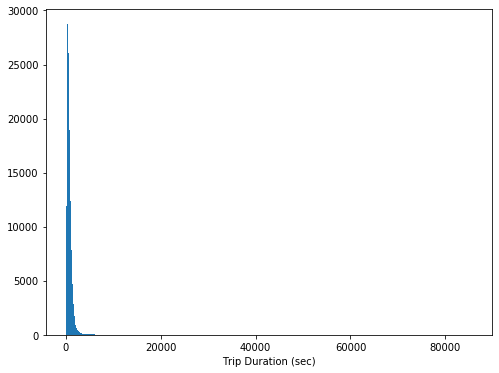

In [13]:
plt.figure(figsize = (8,6))
bins = np.arange(0, baywheels["duration_sec"].max() + 100, 100)
plt.hist(data = baywheels, x ="duration_sec", bins = bins);
plt.xlabel("Trip Duration (sec)");

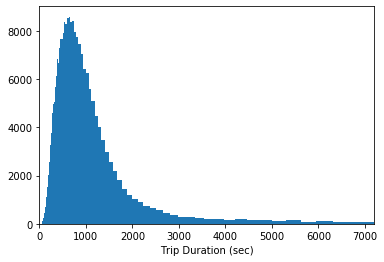

In [14]:
log_binsize = 0.025
bins = 10 ** np.arange(1,  np.log10(baywheels["duration_sec"].max())+log_binsize, log_binsize)
plt.hist(data = baywheels, x ="duration_sec", bins = bins);
plt.xlim((0,3600*2));
plt.xlabel("Trip Duration (sec)");

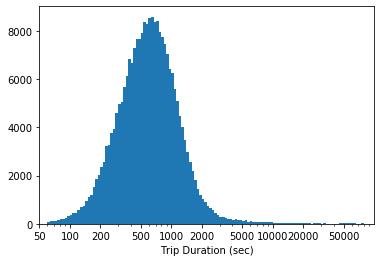

In [15]:
log_binsize = 0.025
bins = 10 ** np.arange(1,  np.log10(baywheels["duration_sec"].max())+log_binsize, log_binsize)

plt.hist(data = baywheels, x ="duration_sec", bins = bins);
plt.xscale("log")
xticks = [50, 100, 200, 500, 1e3, 2e3, 5e3, 1e4, 2e4, 5e4]
xlabels = ["{:.0f}".format(v) for v in xticks]
plt.xlim(50, 1e5)
plt.xticks(xticks, xlabels)
plt.xlabel("Trip Duration (sec)");

There are some outliers in the data. The trip duration of the 1082 data, 0.45% of data, is longer than two hours. The histogram shows that the distribution of the trip duration is right-skewed. I transformed the scale of the x label to the logarithmic scale. This new chart shows a symmetric distribution.

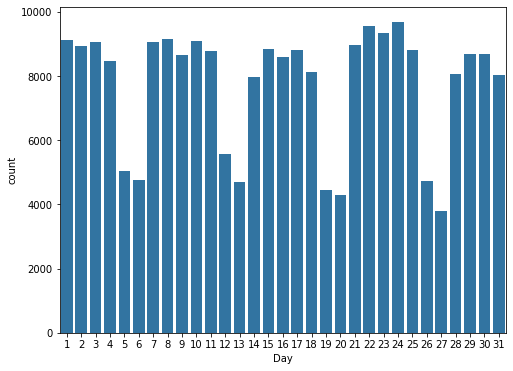

In [16]:
plt.figure(figsize = (8,6))
base_color = sb.color_palette()[0]
sb.countplot(data = baywheels, x = "start_date", color = base_color);
plt.xlabel("Day");

The bar chart shows that the trip number repeats the same pattern every seven days. Therefore, I will make a graph to compare the data by day of the week.

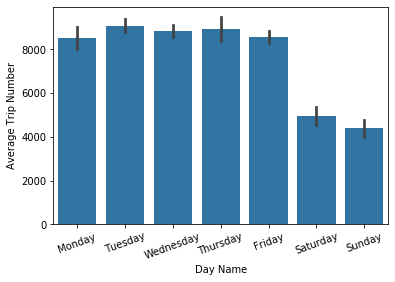

In [17]:
day_classes = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

dclasses = pd.api.types.CategoricalDtype(ordered = True, categories = day_classes)
baywheels["start_wdn"] = baywheels["start_wdn"].astype(dclasses)

trip_num_day = baywheels.groupby("start_date").size().reset_index()
day_name = baywheels.groupby("start_date").first()["start_wdn"].reset_index()
baywheels_sub = pd.merge(trip_num_day, day_name, on = "start_date").rename(columns = {0: "trip_num"})

base_color = sb.color_palette()[0]

sb.barplot(data = baywheels_sub, x = "start_wdn", y = "trip_num", ci = "sd", color = base_color, order = day_classes)
plt.xlabel("Day Name");
plt.xticks(rotation = 20);
plt.ylabel("Average Trip Number");

The result shows that the number of rides on weekdays is larger than during the weekend. I make a column called "weekday" for the following analysis. Then, I analyze the number of users for each time of day.

In [18]:
baywheels["weekdays_fl"] = baywheels["start_wdn"].isin(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]) 
baywheels.loc[baywheels['weekdays_fl'], 'weekdays'] = "Weekday"
baywheels.loc[~(baywheels['weekdays_fl']), 'weekdays'] = "Weekend"

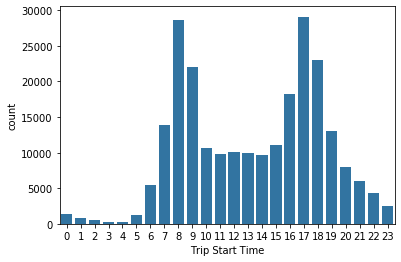

In [19]:
base_color = sb.color_palette()[0]
sb.countplot(data = baywheels, x = "start_hour", color = base_color);
plt.xlabel("Trip Start Time");

The bar chart shows that people mainly use this service in the morning and evening. I want to know the users' age. However, the dataset does not have the information about their age. Instead, I calculate the difference between the birth year and 2019 as an alternative.

In [20]:
baywheels["age"] = 2019 - baywheels["member_birth_year"]
baywheels["age"].describe()

count    239895.000000
mean        449.427316
std         807.655761
min          18.000000
25%          28.000000
50%          35.000000
75%          54.000000
max        2019.000000
Name: age, dtype: float64

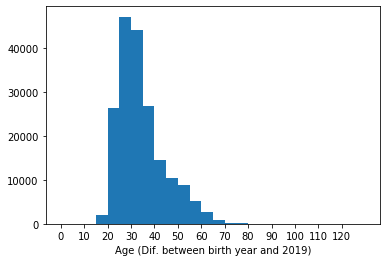

In [21]:
base_color = sb.color_palette()[0]
baywheels_sub = baywheels.query("age < 1000")
bin_edges = np.arange(0, baywheels_sub["age"].max()+5, 5)
plt.hist(data = baywheels_sub, x = "age",bins = bin_edges, color = base_color);
xticks = np.arange(0, 130, 10)
xlabels = ["{:.0f}".format(v) for v in xticks]
plt.xticks(xticks, xlabels)
plt.xlabel("Age (Dif. between birth year and 2019)");

In [22]:
baywheels["age_group"] = baywheels["age"]//10 * 10

In [23]:
baywheels["age_group"].value_counts()

20      73528
30      70989
2010    50217
40      24903
50      14107
60       3640
10       2011
70        379
110        49
120        24
80         24
130        16
100         7
90          1
Name: age_group, dtype: int64

The histogram is left-skewed. The trips of people in their twenties are the largest. There are some outliers in the dataset. Also, the number of journies by users of eighty and over is tiny. Therefore, in the following analyses, I focus on people younger than 80 years old.

In [24]:
baywheels.groupby("member_gender").size() / baywheels.shape[0]

member_gender
Female    0.189070
Male      0.589404
Other     0.012201
dtype: float64

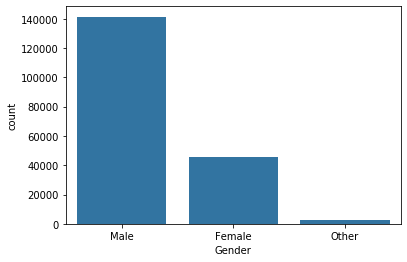

In [25]:
base_color = sb.color_palette()[0]
sb.countplot(data = baywheels, x = "member_gender", color = base_color);
plt.xlabel("Gender");

The column of members' gender has some missing values. The number of trips by male users is three times larger than female users.

user_type
Customer      0.229425
Subscriber    0.770575
dtype: float64


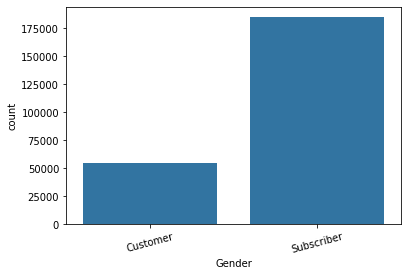

In [26]:
print(baywheels.groupby("user_type").size() / baywheels.shape[0])
base_color = sb.color_palette()[0]
sb.countplot(data = baywheels, x = "user_type", color = base_color);
plt.xlabel("Gender");
plt.xticks(rotation = 15);

The number of trips by subscribers is three times larger than customers.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

I am interested in the parameters that affect the number of trips and the trip duration. In the analyses, I figured out that the day of the week influences the number of rides. Moreover, the distribution of the trips at each time of a day is bimodal. The distribution of trip durations is right-skewed, and there are some outliers such as a 20-hour ride. When it is transformed to a logarithmic scale, the distribution becomes symmetric.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

There are four Mondays, five Tuesdays, five Wednesdays, five Thursdays, four Fridays, four Saturdays, and four Sundays in October 2019. If I simply use the *countplot* function to compare the trip numbers of the day of the week, the numbers of Tuesday, Wednesday, and Thursday are 25% larger than other days of the week. Therefore, I calculated and compared the mean of the trip numbers. 

When comparing the characteristics of users, it is more instinctive to use age compared to the birth year. But, the dataset only has the information of the birth year. I calculated the difference of this year 2019 and the birth year and used it as an alternative. I called this variable "age" in the following analyses.

## Bivariate Exploration

### Variable of Interest: The Number of Trips

First, I will check the relationships between the number of trips and other factors: Day of Week, Time of Day, Member Gender, User Types, Age.

#### The Number of Trips v.s. Day of Week and Time of Day

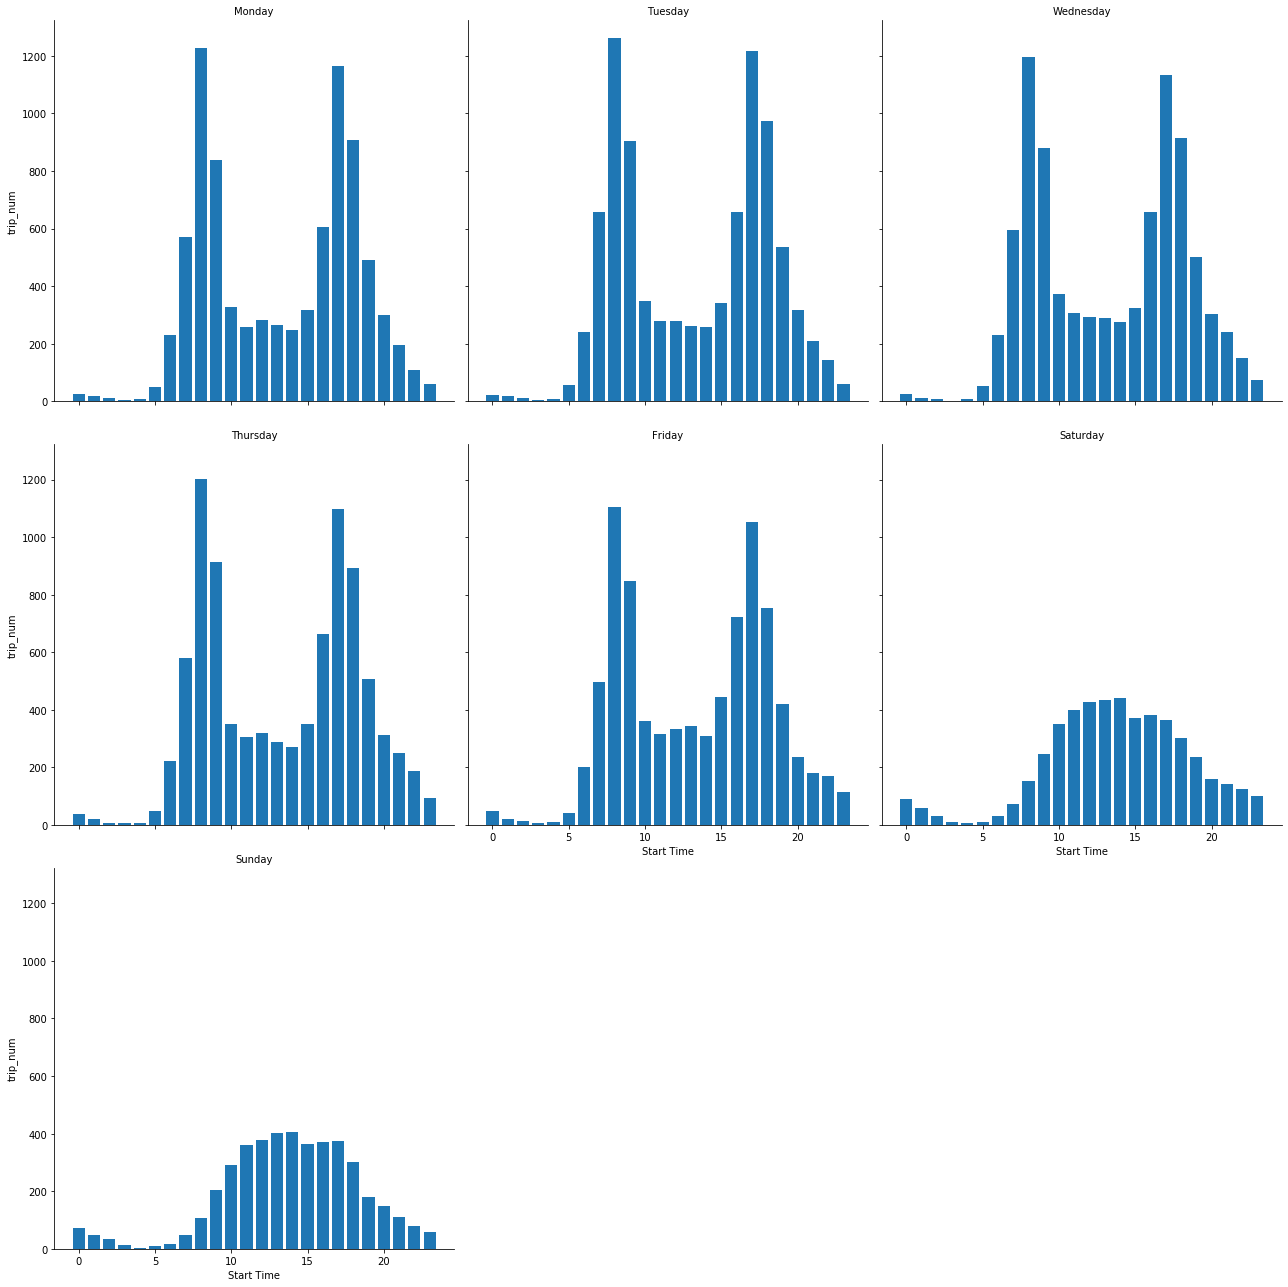

In [27]:
day_classes = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

trip_num_day = baywheels.groupby(["start_date", "start_hour"]).size().reset_index()
day_name = baywheels.groupby("start_date").first()["start_wdn"].reset_index()
baywheels_sub = pd.merge(trip_num_day, day_name, on = "start_date").rename(columns = {0: "trip_num"})
baywheels_sub = baywheels_sub.groupby(["start_wdn", "start_hour"]).mean()["trip_num"].reset_index()
                                    
g = sb.FacetGrid(data = baywheels_sub, col = "start_wdn", col_order = day_classes, col_wrap = 3, height = 6)
g = g.map(plt.bar, "start_hour", "trip_num")
g.set_titles(col_template = "{col_name}");
    
g.set_xlabels("Start Time");

The pattern of trip numbers on weekdays are surprisingly different from those on weekends. The distributions of weekdays are bimodal; they have two peaks: around 8 a.m. and 5 p.m. On the other hand, the distributions on weekends are unimodal, and people mainly use this service in the afternoon.

#### The Number of Trips v.s. Member Gender and Time of Day

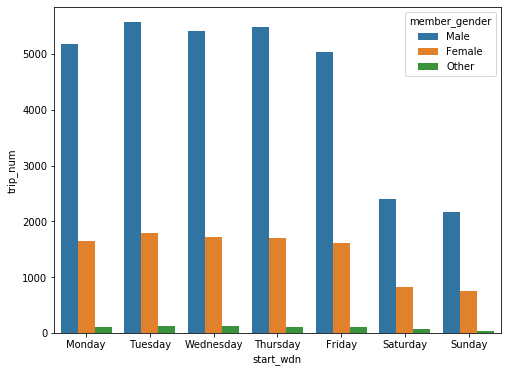

In [28]:
day_classes = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

trip_num_day = baywheels.groupby(["start_date", "member_gender"]).size().reset_index()
day_name = baywheels.groupby("start_date").first()["start_wdn"].reset_index()
baywheels_sub = pd.merge(trip_num_day, day_name, on = "start_date").rename(columns = {0: "trip_num"})
baywheels_sub = baywheels_sub.groupby(["start_wdn", "member_gender"]).mean()["trip_num"].reset_index()

plt.figure(figsize = (8,6))
sb.barplot(data = baywheels_sub, x = "start_wdn", y = "trip_num", hue = "member_gender", 
           order = day_classes, hue_order = ["Male", "Female", "Other"]);

The number of trips by male users is always larger than female use. But, the pattern is almost the same among these two groups.

#### The Number of Trips v.s. User Type and Time of Day

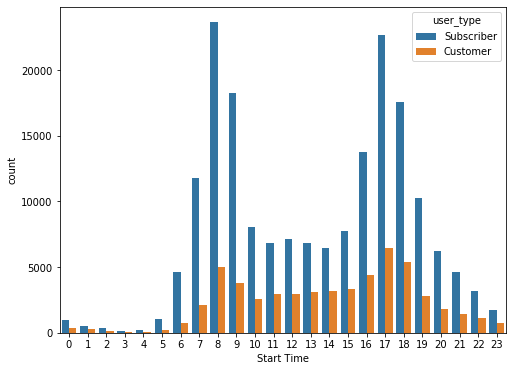

In [29]:
plt.figure(figsize = (8,6))
base_color = sb.color_palette()[0]
sb.countplot(data = baywheels, x = "start_hour", hue = "user_type", hue_order = ["Subscriber", "Customer"]);
plt.xlabel("Start Time");

The number of trips by subscribers is always larger than customers. But, the distribution is almost the same among these two groups.

#### The Number of Trips v.s. Member Age and Time of Day

<Figure size 576x432 with 0 Axes>

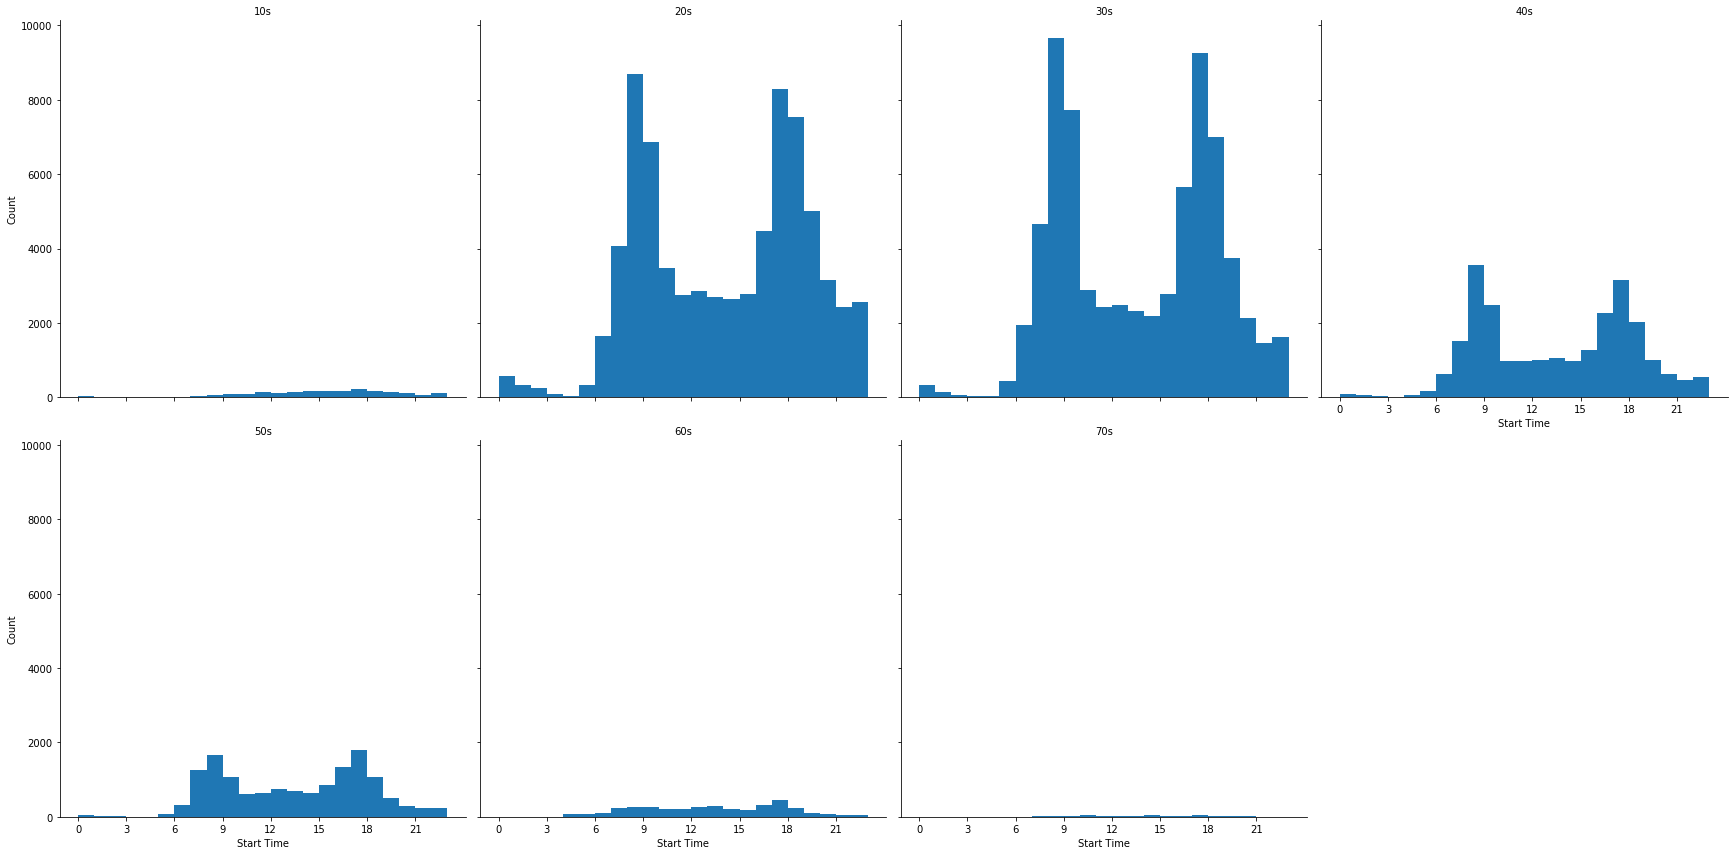

In [30]:
plt.figure(figsize = (8,6));
baywheels_sub = baywheels.query("age < 80").reset_index()
bin_edges = range(24)
g = sb.FacetGrid(data = baywheels_sub, col = "age_group", col_wrap = 4, height = 6);
g = g.map(plt.hist, "start_hour", bins = bin_edges);
g.set_titles(col_template = "{col_name}s").set_xlabels("Start Time").set_ylabels("Count");
xticks = [0, 3, 6, 9, 12, 15, 18, 21]
xlabels = ["{:.0f}".format(v) for v in xticks]
plt.xticks(xticks, xlabels);

People in their twenties, thirties, forties, and fifties are the main users of this service. Their usage pattern is similar to each other. They ride a bike in the morning or evening. 

#### The Number of Trips v.s. Member Age and Day of Week

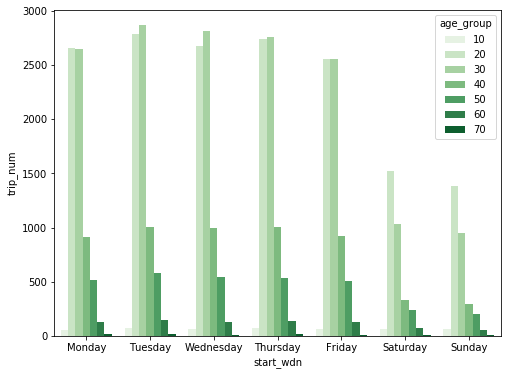

In [31]:
day_classes = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

trip_num_day = baywheels.groupby(["start_date", "age_group"]).size().reset_index()
day_name = baywheels.groupby("start_date").first()["start_wdn"].reset_index()
baywheels_sub = pd.merge(trip_num_day, day_name, on = "start_date").rename(columns = {0: "trip_num"})
baywheels_sub = baywheels_sub.groupby(["start_wdn", "age_group"]).mean()["trip_num"].reset_index()
baywheels_sub = baywheels_sub.query("age_group < 80")

plt.figure(figsize = (8,6))
sb.barplot(data = baywheels_sub, x = "start_wdn", y = "trip_num", hue = "age_group", palette = 'Greens',
           order = day_classes);

Both on weekdays and weekends, the number of usage by those in their twenties and thirties is extremely high, and there is no significant difference among the pattern of these two groups. 

#### The Number of Trips v.s. User Type and Day of Week

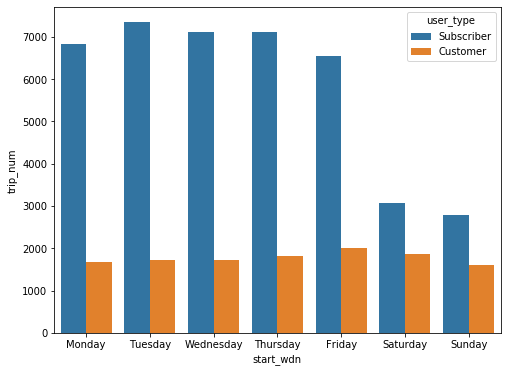

In [32]:
day_classes = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

trip_num_day = baywheels.groupby(["start_date", "user_type"]).size().reset_index()
day_name = baywheels.groupby("start_date").first()["start_wdn"].reset_index()
baywheels_sub = pd.merge(trip_num_day, day_name, on = "start_date").rename(columns = {0: "trip_num"})
baywheels_sub = baywheels_sub.groupby(["start_wdn", "user_type"]).mean()["trip_num"].reset_index()

plt.figure(figsize = (8,6))
sb.barplot(data = baywheels_sub, x = "start_wdn", y = "trip_num", hue = "user_type", 
           order = day_classes, hue_order = ["Subscriber", "Customer"]);

Both on weekdays and weekends, the number of usage by subscribers is larger than by customers. The usage pattern is different from each other. The number of usage by subscribers on weekdays is much larger than on weekends. The customers use this service on weekends as often as on weekdays.

### Variable of Interest : Trip Duration

Next, I will check the relationships between the number of trips and other factors: Day of Week, Time of Day, Member Gender, User Types, Age.

#### Trip Duration v.s. Day of Week

In [33]:
baywheels["log_duration_sec"] = np.log10(baywheels["duration_sec"])

In [34]:
baywheels.groupby(["start_wdn"]).median()["duration_sec"]

start_wdn
Monday       586
Tuesday      580
Wednesday    585
Thursday     586
Friday       593
Saturday     671
Sunday       664
Name: duration_sec, dtype: int64

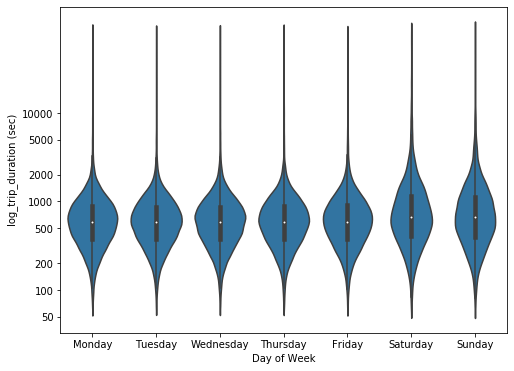

In [35]:
day_classes = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
plt.figure(figsize = (8,6))
base_color = sb.color_palette()[0]
sb.violinplot(data = baywheels, x = "start_wdn", y = "log_duration_sec", order = day_classes, color = base_color)
plt.xlabel("Day of Week");

yticks = np.log10(np.array([50, 100, 200, 500, 1e3, 2e3, 5e3, 1e4]))
ylabels = ["50", "100", "200", "500", "1000", "2000", "5000", "10000"]
plt.yticks(yticks, ylabels)
plt.ylabel("log_trip_duration (sec)");

The violin plots indicate that the medians of the trip duration on weekdays are about 590 seconds, and those on weekends are around 660 seconds. People ride a bicycle for a longer time on Saturdays and Sundays than on weekdays.

#### Trip Duration v.s. Time of Day

In [36]:
baywheels.groupby(["start_hour"]).median()["duration_sec"]

start_hour
0     563.0
1     532.0
2     572.5
3     775.5
4     443.0
5     481.0
6     517.0
7     553.0
8     618.0
9     589.0
10    598.0
11    617.0
12    594.0
13    611.0
14    644.0
15    632.0
16    607.0
17    614.0
18    601.0
19    570.0
20    562.0
21    561.0
22    566.0
23    530.0
Name: duration_sec, dtype: float64

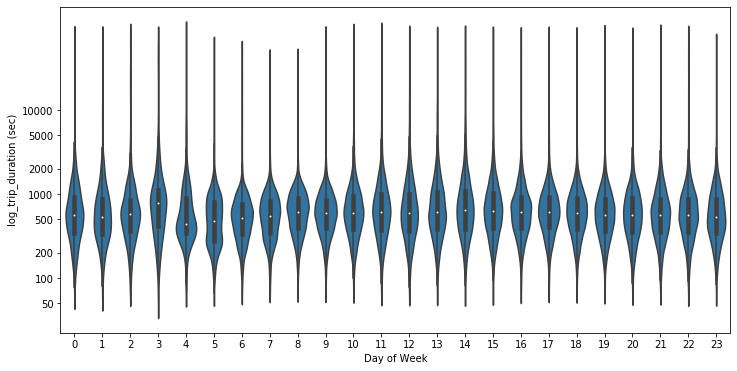

In [37]:
plt.figure(figsize = (12,6))
base_color = sb.color_palette()[0]
sb.violinplot(data = baywheels, x = "start_hour", y = "log_duration_sec", color = base_color)
plt.xlabel("Day of Week");

yticks = np.log10(np.array([50, 100, 200, 500, 1e3, 2e3, 5e3, 1e4]))
ylabels = ["50", "100", "200", "500", "1000", "2000", "5000", "10000"]
plt.yticks(yticks, ylabels)
plt.ylabel("log_trip_duration (sec)");

Surprisingly, people who start to use the bike around 3 a.m. rent a bicycle for the longest period. The plots also indicate that the trip duration in the afternoon is longer than in the morning and evening.

#### Trip Duration v.s. Member Gender

In [38]:
baywheels.groupby(["member_gender"]).median()["duration_sec"]

member_gender
Female    633
Male      535
Other     593
Name: duration_sec, dtype: int64

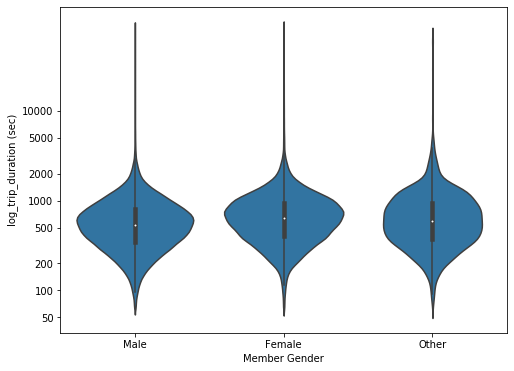

In [39]:
plt.figure(figsize = (8,6))
base_color = sb.color_palette()[0]
sb.violinplot(data = baywheels, x = "member_gender", y = "log_duration_sec", color = base_color)
plt.xlabel("Member Gender");

yticks = np.log10(np.array([50, 100, 200, 500, 1e3, 2e3, 5e3, 1e4]))
ylabels = ["50", "100", "200", "500", "1000", "2000", "5000", "10000"]
plt.yticks(yticks, ylabels)
plt.ylabel("log_trip_duration (sec)");

According to the violin plots, the female users ride a bike a little longer than male users.

#### Trip Duration v.s.User Type

In [40]:
baywheels.groupby(["user_type"]).median()["duration_sec"]

user_type
Customer      800.0
Subscriber    550.0
Name: duration_sec, dtype: float64

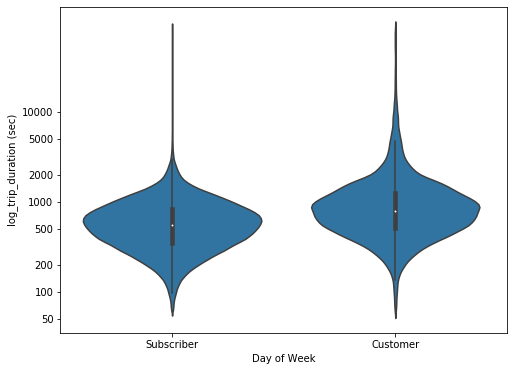

In [41]:
plt.figure(figsize = (8,6))
base_color = sb.color_palette()[0]
sb.violinplot(data = baywheels, x = "user_type", y = "log_duration_sec", color = base_color, order = ["Subscriber", "Customer"])
plt.xlabel("Day of Week");

yticks = np.log10(np.array([50, 100, 200, 500, 1e3, 2e3, 5e3, 1e4]))
ylabels = ["50", "100", "200", "500", "1000", "2000", "5000", "10000"]
plt.yticks(yticks, ylabels)
plt.ylabel("log_trip_duration (sec)");

The median of trip durations by subscribers is 550 seconds, which is 250 seconds shorter than customers. In general, the customers tend to rent a bike longer than subscribers.

#### Trip Duration v.s. Age Group

In [42]:
baywheels.groupby(["age_group"]).median()["duration_sec"]

age_group
10      412.0
20      560.0
30      557.0
40      553.0
50      564.0
60      642.0
70      586.0
80      511.0
90      381.0
100     411.0
110     407.0
120     331.5
130     321.5
2010    782.0
Name: duration_sec, dtype: float64

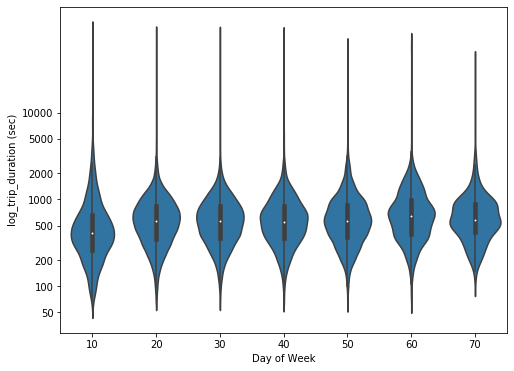

In [43]:
plt.figure(figsize = (8,6))
base_color = sb.color_palette()[0]
baywheels_sub = baywheels.query("age_group < 80")
sb.violinplot(data = baywheels_sub, x = "age_group", y = "log_duration_sec", color = base_color)
plt.xlabel("Day of Week");

yticks = np.log10(np.array([50, 100, 200, 500, 1e3, 2e3, 5e3, 1e4]))
ylabels = ["50", "100", "200", "500", "1000", "2000", "5000", "10000"]
plt.yticks(yticks, ylabels)
plt.ylabel("log_trip_duration (sec)");

The usage time of teenagers varies widely, and their median is less than 500 seconds. The trip duration of people between the twenties and fifties is almost the same, and the medians are around 550 seconds. Users in their sixties travel longer than any other age group.

### Other
#### The characteristic of users

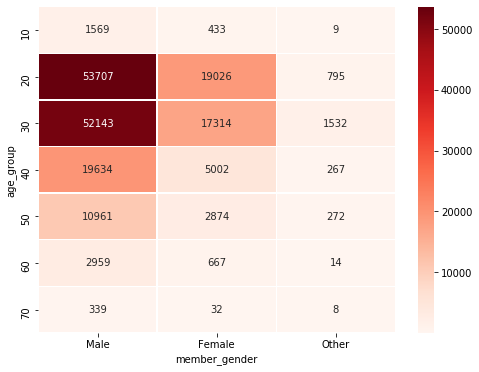

In [44]:
baywheels_sub = baywheels.groupby(["age_group", "member_gender"]).size().reset_index()
baywheels_sub = baywheels_sub.query("age_group < 80")

baywheels_sub = baywheels_sub.pivot(index = "age_group", columns = "member_gender", values = 0)

baywheels_sub = baywheels_sub.loc[:, ['Male','Female','Other']]

plt.figure(figsize = [8, 6])
sb.heatmap(baywheels_sub, cmap='Reds', linewidths=0.5, annot=True, fmt="d");

The heatmap shows that baywheels users are most commonly men in their 20's and 30's, followed by men in their 40's and women in their 20's and 30's.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

#### The number of trips

I found that the three variables, day of the week, time of day, and user type, largely influence the number of trips. The usage pattern on weekdays is different from those on weekends. People commonly ride a bike in the morning and evening on weekdays and in the afternoon on weekends. Subscribers mainly use this service on weekdays, but customers use it both on weekdays and weekends.

#### The trip duration

The trip duration is decided by day of the week, time of the day, user type, member gender, and age. Users on weekends rent a bike for a longer time than on weekdays, subscribers than customers, and female users than male users.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The usage by men in their twenties and thirties is much more than any other user group. 

## Multivariate Exploration

### Variable of Interest: The Number of Trips

Through the Bivariate Exploration, I figured out that three features, day of the week, time of the day, and user type have a significant influence on the number of trips. In this section, I analyze these three variables together.

#### Plot Trip Counts of each time against the Day of the Week and User Type

/Users/HiroyukiKondo/.pyenv/versions/anaconda3-5.2.0/envs/anaconda3-5.2.0/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


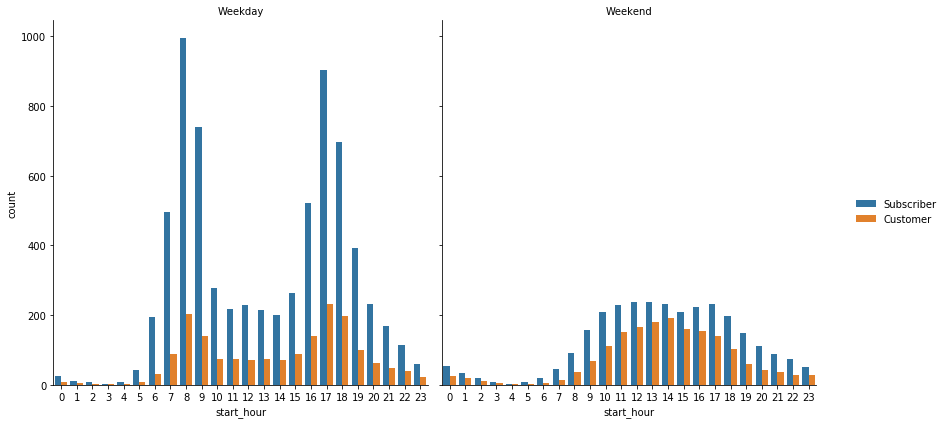

In [45]:
baywheels_sub = baywheels.groupby(["start_date", "start_hour", "user_type"]).size().reset_index().rename(columns = {0 : "count"})
day_name = baywheels.groupby("start_date").first().reset_index()[["start_date", "start_wdn", "weekdays"]]
baywheels_sub = pd.merge(baywheels_sub, day_name, how = "left", on= "start_date")
baywheels_sub = baywheels_sub.groupby(["weekdays", "start_hour", "user_type"]).mean()["count"].reset_index()


g = sb.FacetGrid(data = baywheels_sub, col = "weekdays", height = 6, margin_titles = True)
g = g.map(sb.barplot, "start_hour", "count", "user_type", hue_order=["Subscriber", "Customer"], 
          palette=sb.color_palette([sb.color_palette(n_colors=24)[0], sb.color_palette(n_colors=24)[1]]))
g.set_titles(col_template = "{col_name}");
g.add_legend();

There is no big difference in the usage pattern of subscribers and customers both on weekdays and weekends. They commonly use the bike in the morning and evening of weekdays and on the afternoon of weekends.

### Variable of Interest: Trip Duration
Through the previous analyses, I figured out that five features, day of the week, time of the day, user type, member gender, and age have a significant influence on the trip duration. In this section, I analyze these variables together.

#### Trip Duration against Day of Week and Time of Day

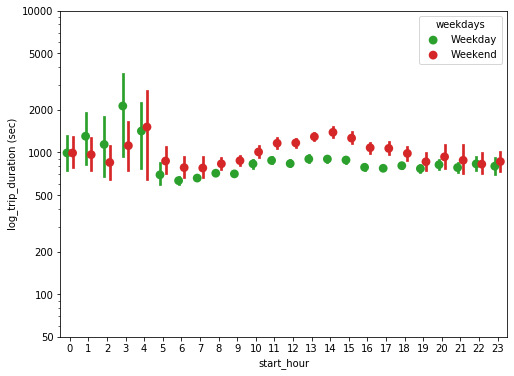

In [46]:
current_palette = sb.color_palette(n_colors=24)
plt.figure(figsize = (8,6))
sb.pointplot(data = baywheels, x = "start_hour", y = "duration_sec", hue = "weekdays",  
             palette = [current_palette[2], current_palette[3]], linestyles = '', dodge = 0.3);

plt.yscale("log")
yticks =np.array([50, 100, 200, 500, 1000, 2000, 5000, 10000])
ylabels = ["50", "100", "200", "500", "1000", "2000", "5000", "10000"]
plt.yticks(yticks, ylabels)
plt.ylabel("log_trip_duration (sec)");

In almost all of the time of the day, the trip duration on weekends is longer than weekdays. Especially, the trip time in the afternoon of weekends is clearly longer. This result suggests that the utilization purpose is different. 

Surprisingly, users rent a bike for the longest time at 3 a.m on weekdays. But, the number of trips at  3 a.m. is tiny, and it is expected that some outliers cause this weird result.

#### Trip Duration against Start Time and User Type

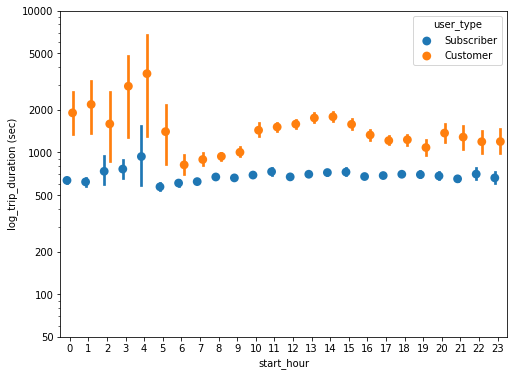

In [47]:
plt.figure(figsize = (8,6))
sb.pointplot(data = baywheels, x = "start_hour", y = "duration_sec", hue = "user_type",  
             hue_order=["Subscriber", "Customer"], linestyles = '', dodge = 0.3);

plt.yscale("log")
yticks =np.array([50, 100, 200, 500, 1000, 2000, 5000, 10000])
ylabels = ["50", "100", "200", "500", "1000", "2000", "5000", "10000"]
plt.yticks(yticks, ylabels)
plt.ylabel("log_trip_duration (sec)");

In almost all of the time of the day, the trip duration of customers (one-time users) is longer than subscribers. Especially, the duration of the trips which start between 10 a.m. and 5 p.m. is long.  The trip duration at night is longer than in daytime. However, their confidence intervals are larger than those of the daytime, which suggests that some outliers affect the result.

#### Trip Duration Against Day of Week and User Type

In [48]:
baywheels.groupby(["weekdays", "user_type"]).mean()["duration_sec"]

weekdays  user_type 
Weekday   Customer      1198.275547
          Subscriber     671.263058
Weekend   Customer      1659.337833
          Subscriber     747.821174
Name: duration_sec, dtype: float64

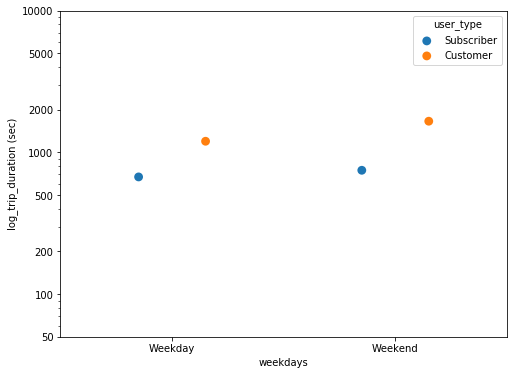

In [49]:
plt.figure(figsize = (8,6))
sb.pointplot(data = baywheels, x = "weekdays", y = "duration_sec", hue = "user_type",  
             hue_order=["Subscriber", "Customer"], linestyles = '', dodge = 0.3);

plt.yscale("log")
yticks =np.array([50, 100, 200, 500, 1000, 2000, 5000, 10000])
ylabels = ["50", "100", "200", "500", "1000", "2000", "5000", "10000"]
plt.yticks(yticks, ylabels)
plt.ylabel("log_trip_duration (sec)");

The trip duration of customers is longer than subscribers both on weekdays and weekends. This result agrees with the findings in the previous process. Interestingly, the trip period of customers is different between weekdays and weekends. But the trip time of subscribers is almost the same regardless of the day of the week.

#### Trip duration by Start Time and User Type for Weekdays and Weekends

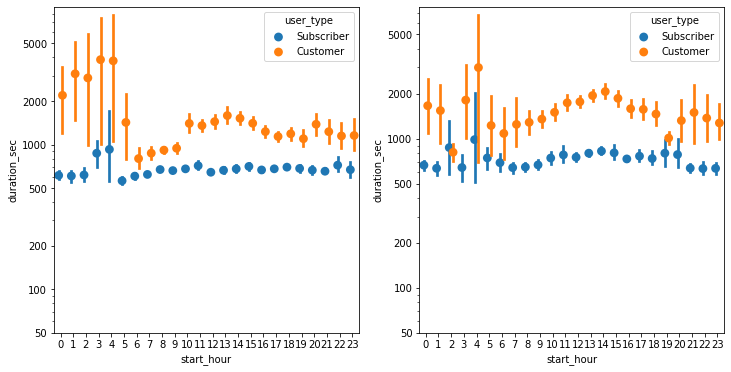

In [50]:
fig, ax = plt.subplots(ncols = 2, figsize = [12,6])

sb.pointplot(data = baywheels.query("weekdays == 'Weekday'"),  x = "start_hour", y = "duration_sec",
             hue = "user_type",  hue_order = ["Subscriber", "Customer"], linestyles = '', dodge = 0.3, ax = ax[0]);
ax[0].set_yscale('log')
ax[0].set_yticks([50, 100, 200, 500, 1000, 2000, 5000])
ax[0].set_yticklabels(["50", "100", "200", "500", "1000", "2000", "5000"])
ax[0].set_yticklabels([],minor = True)

sb.pointplot(data = baywheels.query("weekdays == 'Weekend'"), x = "start_hour", y = "duration_sec", 
             hue = "user_type",  hue_order = ["Subscriber", "Customer"], linestyles = '', dodge = 0.3, ax = ax[1]);
ax[1].set_yscale('log')
ax[1].set_yticks([50, 100, 200, 500, 1000, 2000, 5000])
ax[1].set_yticklabels(["50", "100", "200", "500", "1000", "2000", "5000"])
ax[1].set_yticklabels([],minor = True)
plt.show();

According to these two charts, customers have longer travels than subscribers at any time of the day. Especially, the trip duration of customers around 2 p.m. on weekends is about 2000 seconds, which is twice as long as subscribers. Surprisingly, the average trip duration of customers at night is more than 2000 seconds. However, the confidence intervals are huge. It is expected that some outliers affect the average.

#### Trip Duration against Day of Week and Age

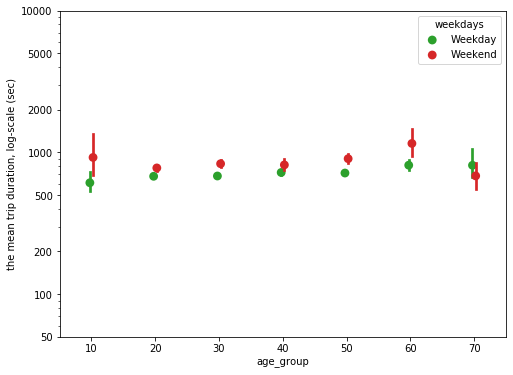

In [51]:
plt.figure(figsize = (8,6))
baywheels_sub = baywheels.query("age_group < 80")
sb.pointplot(data = baywheels_sub, x = "age_group", y = "duration_sec", hue = "weekdays", 
             palette = [current_palette[2], current_palette[3]], linestyles = '', dodge = True);

plt.yscale("log")
yticks =np.array([50, 100, 200, 500, 1000, 2000, 5000, 10000])
ylabels = ["50", "100", "200", "500", "1000", "2000", "5000", "10000"]
plt.yticks(yticks, ylabels)
plt.ylabel("the mean trip duration, log-scale (sec)");

People travel for a longer time on weekends than on weekdays except those in their seventies. This result agrees with the findings in the previous analyses.

#### Trip Duration against Day of Week and Member Gender

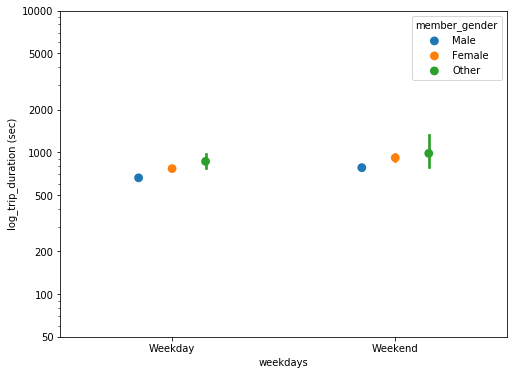

In [52]:
plt.figure(figsize = (8,6))
sb.pointplot(data = baywheels, x = "weekdays", y = "duration_sec", hue = "member_gender",  linestyles = '', dodge = 0.3);

plt.yscale("log")
yticks =np.array([50, 100, 200, 500, 1000, 2000, 5000, 10000])
ylabels = ["50", "100", "200", "500", "1000", "2000", "5000", "10000"]
plt.yticks(yticks, ylabels)
plt.ylabel("log_trip_duration (sec)");

The average trip time of male members is shorter than female users. This result is in agreement with the previous ones.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?


#### The Number of Trips
According to the visualization, the usage pattern of the two user types is almost the same. Both of them use a bike in the morning and evening of the weekdays and the afternoon of weekends. These findings suggest that not only subscribers but also customers use this service for their commute. 
    
#### Trip Duration

Through the exploration process, I found that the combination of day of the week, user types, and time of the day mainly decides the trip duration of users. One-time users on the weekend ride a bike more than 25 minutes on average, which is twice longer than the trips by subscribers on weekends and 38% longer than their usage on weekdays. When I consider this result that the travel time in the afternoon is longer than other times of the day on weekends, the one-time users rent a bike for sight-seeing or recreation.


### Were there any interesting or surprising interactions between features?

The duration of the trips that start around 3 a.m. is longer than other start time. But, the number of trips at 3 a.m. is the smallest in a day. It is expected that the trip duration becomes longer because of the small number of outliers.

## References
[1]https://www.lyft.com/bikes/bay-wheels/pricing